In [ ]:
#@title install (only run once)
%rm -r dreamgaussian
!git clone https://github.com/dreamgaussian/dreamgaussian
%cd dreamgaussian

# install dependencies
!pip install -q einops plyfile dearpygui huggingface_hub diffusers accelerate transformers xatlas trimesh PyMCubes pymeshlab rembg[gpu,cli] omegaconf ninja

# build extension from source (can be slow)
# !git clone --recursive https://github.com/ashawkey/diff-gaussian-rasterization
# !pip install -q ./diff-gaussian-rasterization
# !pip install -q ./simple-knn

# pre-built wheels (faster)
!pip install -q https://github.com/camenduru/diff-gaussian-rasterization/releases/download/v1.0/diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.1.whl
!pip install -q https://github.com/camenduru/diff-gaussian-rasterization/releases/download/v1.0/simple_knn-0.0.0-cp310-cp310-linux_x86_64.1.whl

# nvdiffrast
!pip install -q git+https://github.com/NVlabs/nvdiffrast

# kiuikit
!pip install -q git+https://github.com/ashawkey/kiuikit

%mkdir -p data

rm: cannot remove 'dreamgaussian': No such file or directory
Cloning into 'dreamgaussian'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 171 (delta 75), reused 48 (delta 39), pack-reused 63
Receiving objects: 100% (171/171), 1.24 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/dreamgaussian
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.5/688.5 kB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 34.1 MB/s eta 0:00:00
     ━━

/content/dreamgaussian/data


Saving test.png to test.png
/content/dreamgaussian


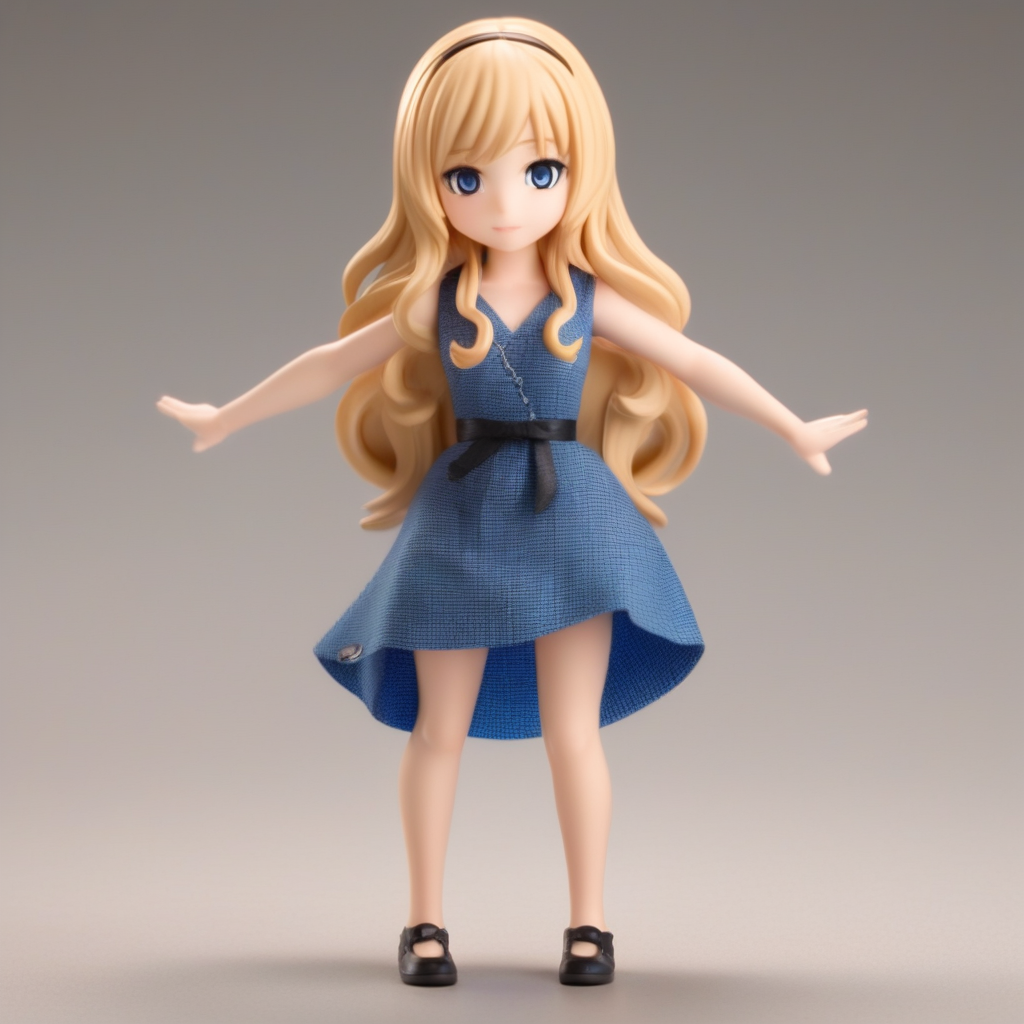

In [ ]:
#@title upload image

import os

%cd data/
%rm * # remove all old files!
from google.colab import files
uploaded = files.upload()
IMAGE = os.path.basename(next(iter(uploaded))) # filename
%cd ..

# display image
from IPython.display import Image, display
display(Image(f'data/{IMAGE}', width=256, height=256))

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 140GB/s]


[INFO] loading image data/test.png...
[INFO] background removal...
[INFO] recenter...


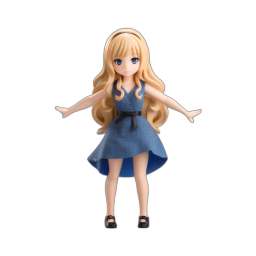

In [ ]:
#@title preprocess image

# preprocess
%run process.py data/{IMAGE}

NAME = os.path.splitext(IMAGE)[0]
IMAGE_PROCESSED = NAME + '_rgba.png'

# display processed image
from IPython.display import Image, display
display(Image(f'data/{IMAGE_PROCESSED}', width=256, height=256))

Elevation: estimated elevation angle, default to 0 (horizontal), range from [-90, 90]. If you upload a look-down image, try a value like -30.

In [ ]:
#@markdown ####**Settings:**
Elevation = 0 #@param {type: 'integer'}

In [ ]:
#@title training!

# stage 1
%run main.py --config configs/image.yaml input=data/{IMAGE_PROCESSED} save_path={NAME} elevation={Elevation} force_cuda_rast=True

# stage 2
%run main2.py --config configs/image.yaml input=data/{IMAGE_PROCESSED} save_path={NAME} elevation={Elevation} force_cuda_rast=True

[INFO] load image from data/test_rgba.png...
Number of points at initialisation :  5000
[INFO] loading zero123...


model_index.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

clip_camera_projection/zero123.py:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

clip_camera_projection/config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by Zero123Pipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

[INFO] loaded zero123!


100%|██████████| 500/500 [01:12<00:00,  6.90it/s]
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[INFO] save model to logs/test_model.ply.


Tensor occ torch.Size([128, 128, 128]) torch.float32 cuda:0 ∈ [0.0, 62.96516418457031] μ = 0.45203232765197754 σ = 
2.596360445022583

[INFO] mesh cleaning: (24738, 3) --> (13274, 3), (49468, 3) --> (26544, 3)
[INFO] marching cubes result: torch.Size([13274, 3]) (-0.690752387046814-0.7011527419090271), torch.Size([26544, 3])
[INFO] unwrap uv...
[INFO] save model to logs/test_mesh.obj.
[load_obj] use texture from: logs/test_mesh_albedo.png
[load_obj] load texture: (1024, 1024, 3)
[Mesh loading] v: torch.Size([16372, 3]), f: torch.Size([26544, 3])
[Mesh loading] vn: torch.Size([16372, 3]), fn: torch.Size([26544, 3])
[INFO] load image from data/test_rgba.png...
[INFO] loading zero123...


Keyword arguments {'trust_remote_code': True} are not expected by Zero123Pipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

[INFO] loaded zero123!


100%|██████████| 50/50 [00:22<00:00,  2.17it/s]


[INFO] save model to logs/test.obj.


In [ ]:
#@title render a video for displaying

# the final mesh is saved to ./logs/NAME.obj
%run -m kiui.render logs/{NAME}.obj --save_video {NAME}.mp4 --wogui --force_cuda_rast

from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width=450):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video(f'{NAME}.mp4')

[load_obj] use texture from: logs/test_albedo.png
[load_obj] load texture: (1024, 1024, 3)
[Mesh loading] v: torch.Size([16372, 3]), f: torch.Size([26544, 3])
[Mesh loading] vn: torch.Size([16372, 3]), fn: torch.Size([26544, 3])


100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
